# Smoking Dataset Analysis

This notebook presents an analysis of a dataset about smoking habits.
## Importing Libraries

First, we import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Loading and Cleaning the Data

We load the data from a CSV file and perform some initial cleaning. We fill missing values in the 'amt_weekends' and 'amt_weekdays' columns with 0, and drop the 'type' column. We also rename the 'Unnamed: 0' column to 'ids'.

In [2]:
df = pd.read_csv("smoking.csv")
df.replace("NA", np.nan, inplace=True)


In [3]:
df.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1691 non-null   int64  
 1   gender                 1691 non-null   object 
 2   age                    1691 non-null   int64  
 3   marital_status         1691 non-null   object 
 4   highest_qualification  1691 non-null   object 
 5   nationality            1691 non-null   object 
 6   ethnicity              1691 non-null   object 
 7   gross_income           1691 non-null   object 
 8   region                 1691 non-null   object 
 9   smoke                  1691 non-null   object 
 10  amt_weekends           421 non-null    float64
 11  amt_weekdays           421 non-null    float64
 12  type                   421 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 171.9+ KB


In [5]:
df.describe()

,Unnamed: 0,age,amt_weekends,amt_weekdays
count,1691.000000,1691.000000,421.000000,421.000000
mean,846.000000,49.836192,16.410926,13.750594
std,488.293969,18.736851,9.892988,9.388292
min,1.000000,16.000000,0.000000,0.000000
25%,423.500000,34.000000,10.000000,7.000000
50%,846.000000,48.000000,15.000000,12.000000
75%,1268.500000,65.500000,20.000000,20.000000
max,1691.000000,97.000000,60.000000,55.000000


In [6]:
print(df.isnull().sum())

Unnamed: 0                  0
gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64


In [7]:
df=df.copy()
df['amt_weekends']=df['amt_weekends'].fillna(0).astype(int)
df['amt_weekdays']=df['amt_weekdays'].fillna(0).astype(int)
df.drop(columns=['type'], inplace=True)
df = df.rename(columns={'Unnamed: 0': 'ids'})


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ids                    1691 non-null   int64 
 1   gender                 1691 non-null   object
 2   age                    1691 non-null   int64 
 3   marital_status         1691 non-null   object
 4   highest_qualification  1691 non-null   object
 5   nationality            1691 non-null   object
 6   ethnicity              1691 non-null   object
 7   gross_income           1691 non-null   object
 8   region                 1691 non-null   object
 9   smoke                  1691 non-null   object
 10  amt_weekends           1691 non-null   int64 
 11  amt_weekdays           1691 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 158.7+ KB


In [9]:
print('Dimensões do dataframe:', df.shape)
print('Quantidade de valores faltantes:', df.isna().sum().sum())

Dimensões do dataframe: (1691, 12)
Quantidade de valores faltantes: 0


## Exploratory Data Analysis

We start our exploratory data analysis by examining the structure of the dataset and the distribution of various features. We plot the distribution of several features including 'gender', 'age', 'ethnicity', 'highest_qualification', 'nationality', 'amt_weekends', and 'marital_status'.

We then create a subset of the data containing only smokers, and plot the distribution of the same features for this subset.

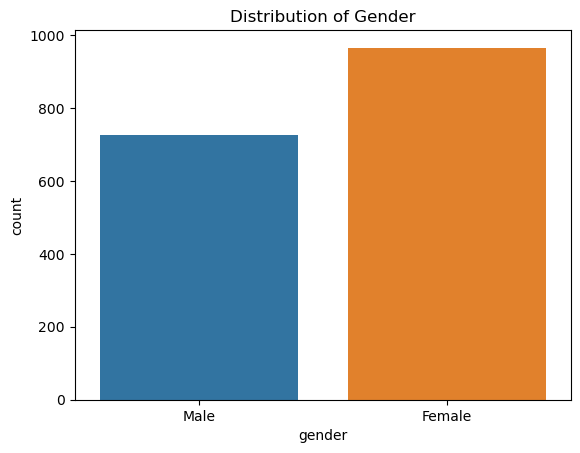

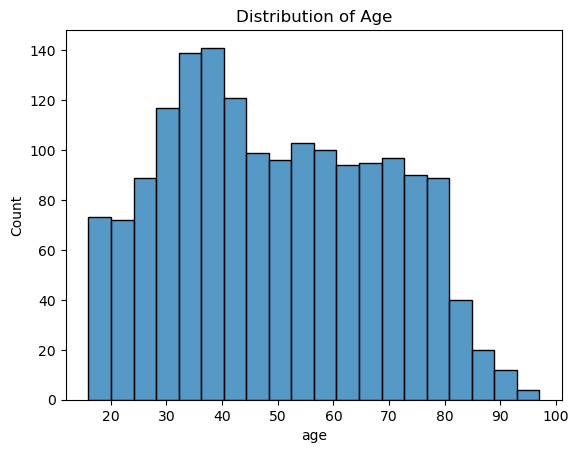

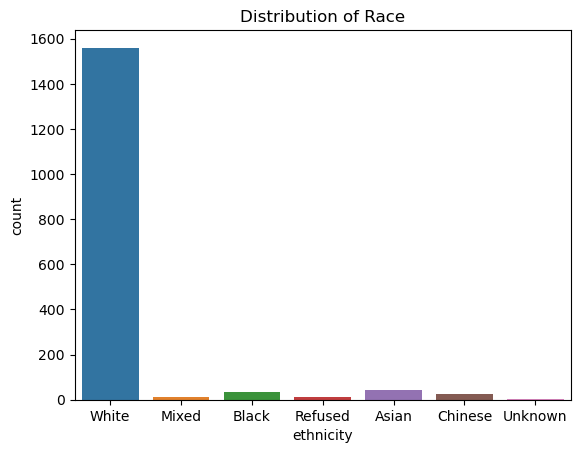

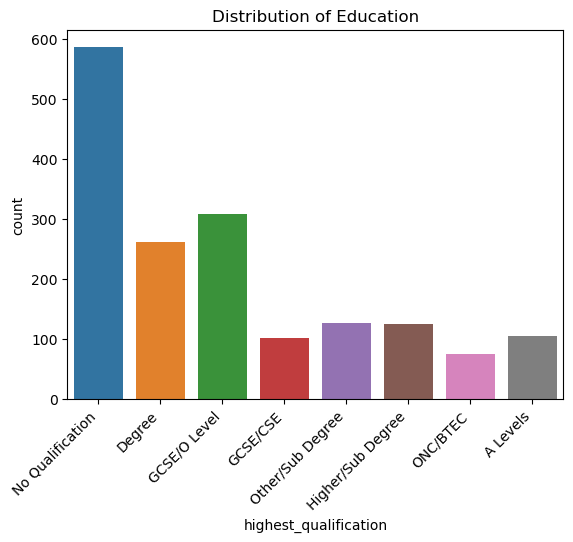

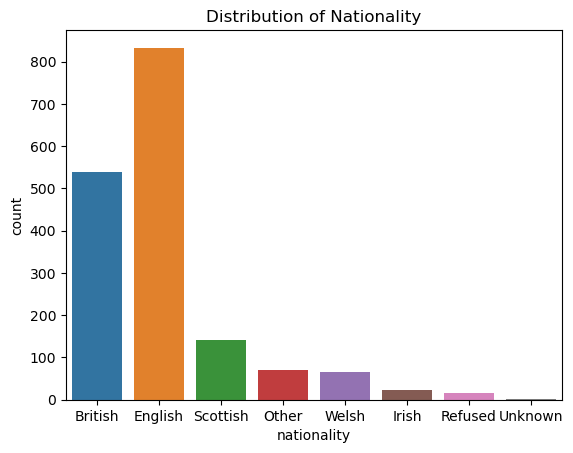

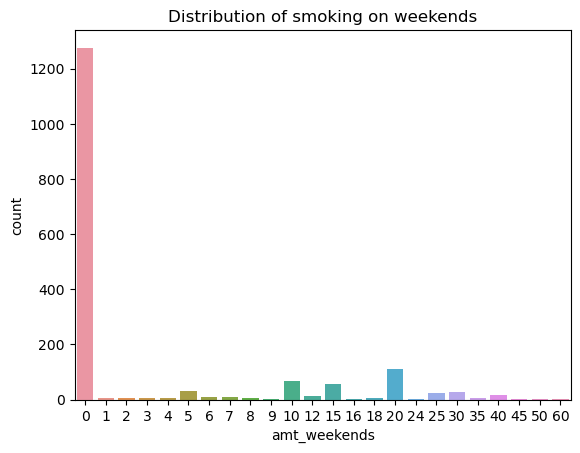

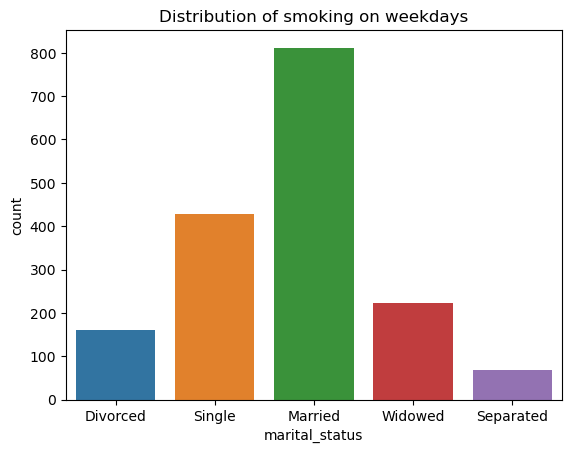

In [10]:
data= df
# Distribution of gender
sns.countplot(data=data, x='gender')
plt.title('Distribution of Gender')
plt.show()

# Distribution of age
sns.histplot(data=data, x='age', bins=20)
plt.title('Distribution of Age')
plt.show()

# Distribution of race
sns.countplot(data=data, x='ethnicity')
plt.title('Distribution of Race')
plt.show()

# Distribution of education
sns.countplot(data=data, x='highest_qualification')
plt.title('Distribution of Education')
plt.xticks(rotation=45, ha='right')
plt.show()

# Distribution of country
sns.countplot(data=data, x='nationality')
plt.title('Distribution of Nationality')
plt.show()

# Distribution of nicotine dependence
sns.countplot(data=data, x='amt_weekends')
plt.title('Distribution of smoking on weekends')
plt.show()

# Distribution of smoking status
sns.countplot(data=data, x='marital_status')
plt.title('Distribution of smoking on weekdays')
plt.show()




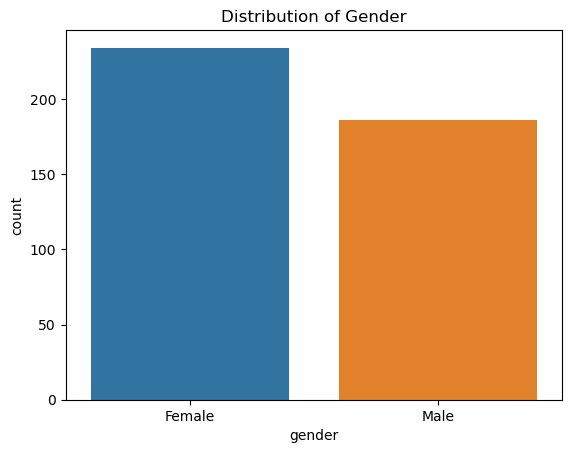

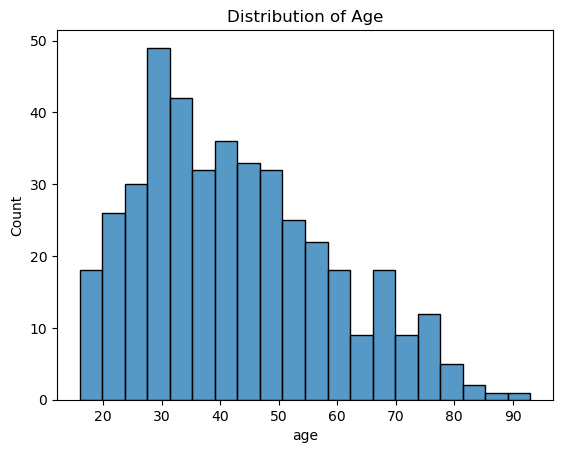

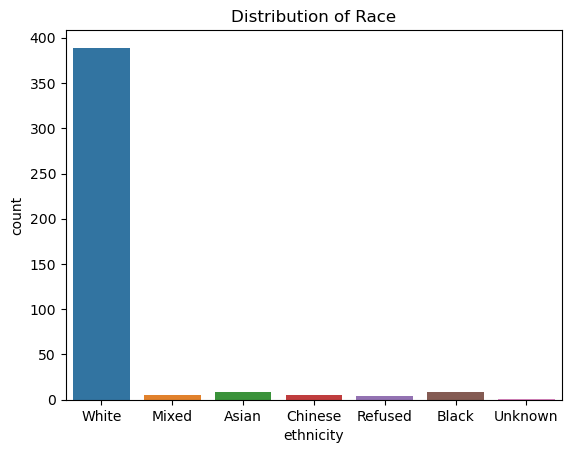

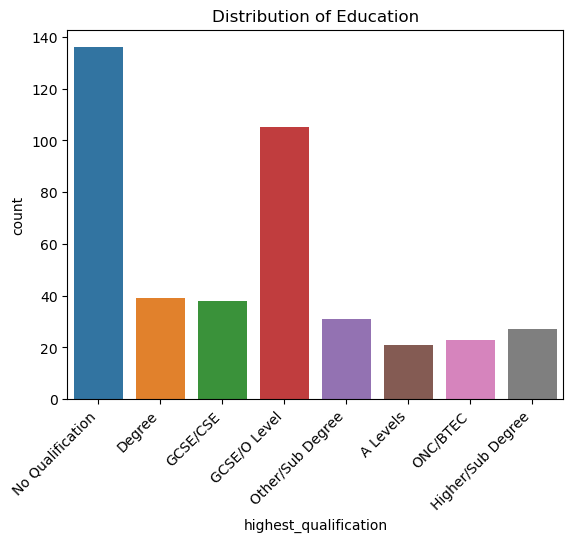

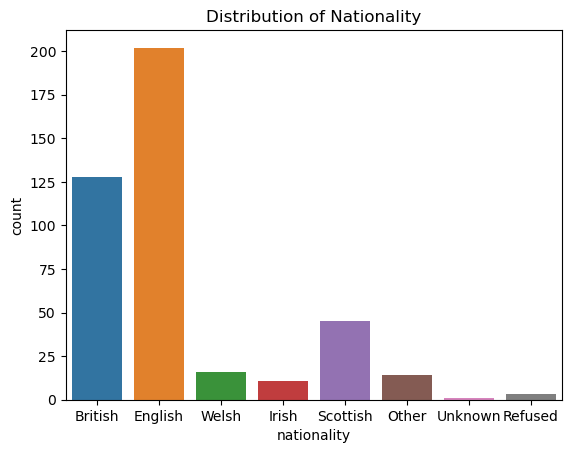

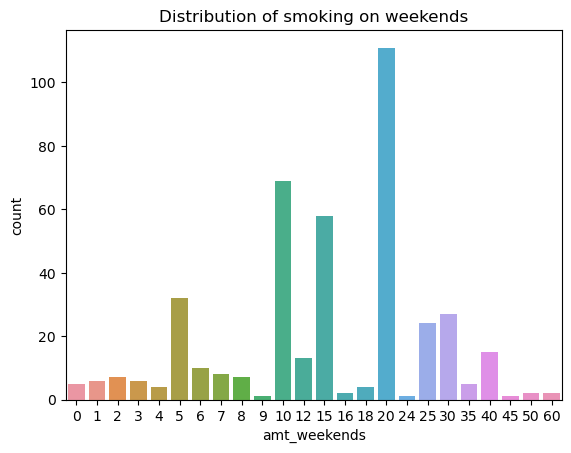

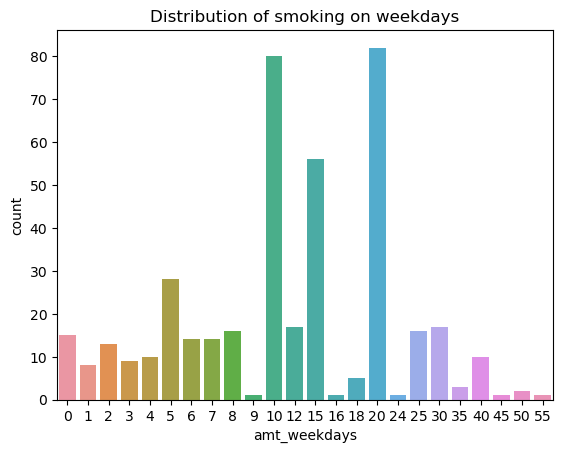

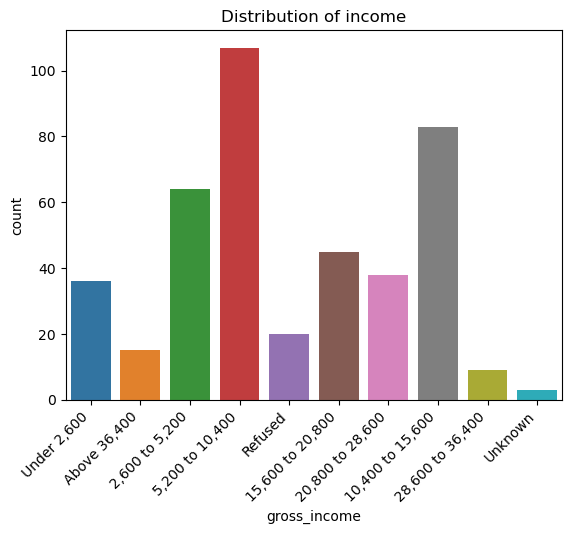

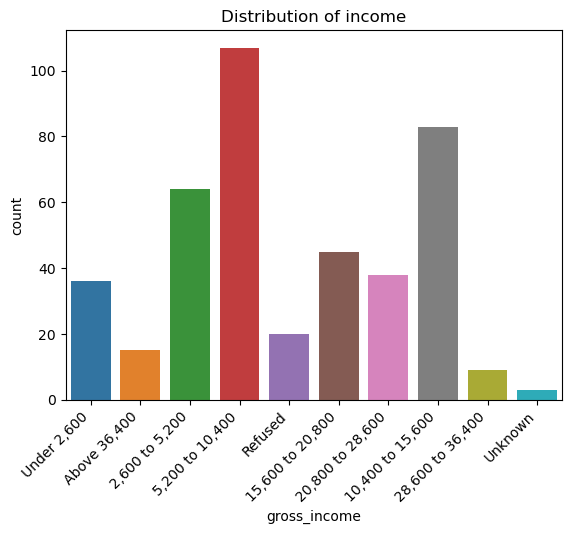

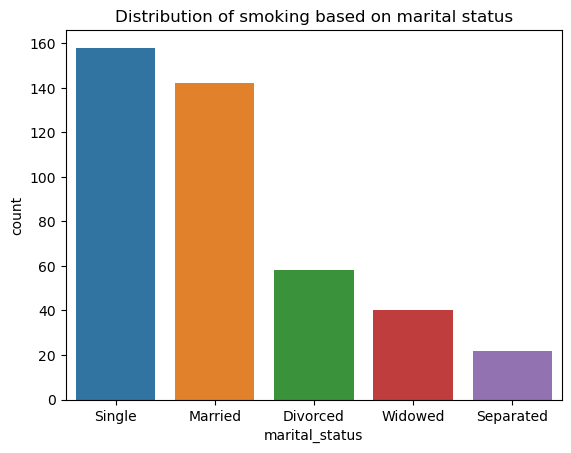

In [11]:
only_smokers = df[(df['amt_weekdays'] > 0) | (df['amt_weekends'] > 0)]

data = only_smokers

sns.countplot(data=data, x='gender')
plt.title('Distribution of Gender')
plt.show()

# Distribution of age
sns.histplot(data=data, x='age', bins=20)
plt.title('Distribution of Age')
plt.show()

# Distribution of race
sns.countplot(data=data, x='ethnicity')
plt.title('Distribution of Race')
plt.show()

# Distribution of education
sns.countplot(data=data, x='highest_qualification')
plt.title('Distribution of Education')
plt.xticks(rotation=45, ha='right')
plt.show()

# Distribution of country
sns.countplot(data=data, x='nationality')
plt.title('Distribution of Nationality')
plt.show()

# Distribution of nicotine dependence
sns.countplot(data=data, x='amt_weekends')
plt.title('Distribution of smoking on weekends')
plt.show()

# Distribution of smoking status
sns.countplot(data=data, x='amt_weekdays')
plt.title('Distribution of smoking on weekdays')
plt.show()

sns.countplot(data=data,x='gross_income')
plt.title('Distribution of income')
plt.xticks(rotation=45, ha='right')
plt.show()

sns.countplot(data=data,x='gross_income')
plt.title('Distribution of income')
plt.xticks(rotation=45, ha='right')
plt.show()

sns.countplot(data=data, x='marital_status')
plt.title('Distribution of smoking based on marital status')
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ids                    1691 non-null   int64 
 1   gender                 1691 non-null   object
 2   age                    1691 non-null   int64 
 3   marital_status         1691 non-null   object
 4   highest_qualification  1691 non-null   object
 5   nationality            1691 non-null   object
 6   ethnicity              1691 non-null   object
 7   gross_income           1691 non-null   object
 8   region                 1691 non-null   object
 9   smoke                  1691 non-null   object
 10  amt_weekends           1691 non-null   int64 
 11  amt_weekdays           1691 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 158.7+ KB


In [13]:
porcentage= (only_smokers.shape[0]/df.shape[0])*100
print(f"{porcentage:.2f}% do dataset é composto por fumantes")

24.84% do dataset é composto por fumantes


## Preparing the Data for Machine Learning

We use a LabelEncoder to convert categorical data to numerical data. We split the data into a training set and a test set, and scale the features.


In [14]:
# Split the data

X = df.drop(columns=["smoke",'amt_weekdays','amt_weekends','ids'])
X = pd.get_dummies(X)
y = df["smoke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ids                    1691 non-null   int64 
 1   gender                 1691 non-null   object
 2   age                    1691 non-null   int64 
 3   marital_status         1691 non-null   object
 4   highest_qualification  1691 non-null   object
 5   nationality            1691 non-null   object
 6   ethnicity              1691 non-null   object
 7   gross_income           1691 non-null   object
 8   region                 1691 non-null   object
 9   smoke                  1691 non-null   object
 10  amt_weekends           1691 non-null   int64 
 11  amt_weekdays           1691 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 158.7+ KB


## Machine Learning

We train a Logistic Regression model on the data, make predictions on the test set, and evaluate the model's performance. We also print the feature importance scores.

In [24]:


n = int(1e3)

num_features = X_train.shape[1]
dic_test = {i: [] for i in range(num_features)}

for _ in range(n):
    model = LogisticRegression(penalty='l1', C=1e6, solver='liblinear')
    model.fit(X_train, y_train)
    importance = model.coef_[0]
    
    for e, v in enumerate(importance):
        dic_test[e].append(v)  




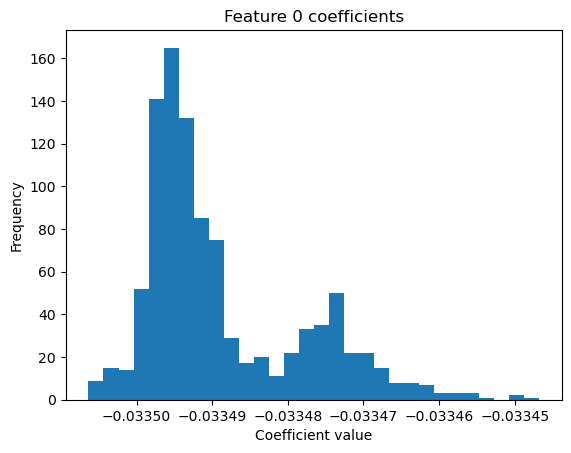

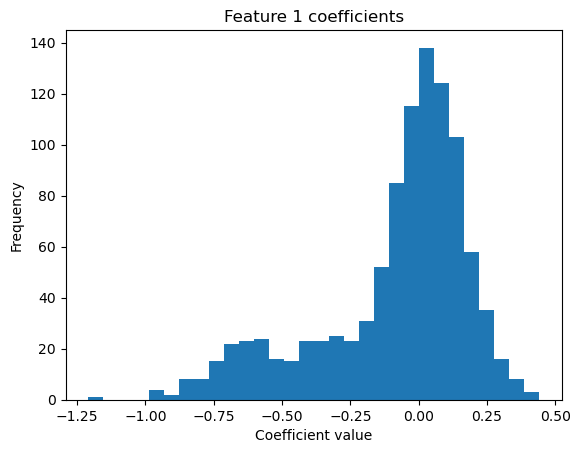

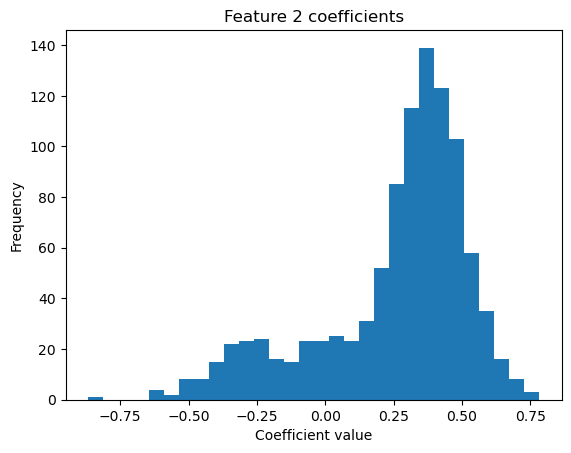

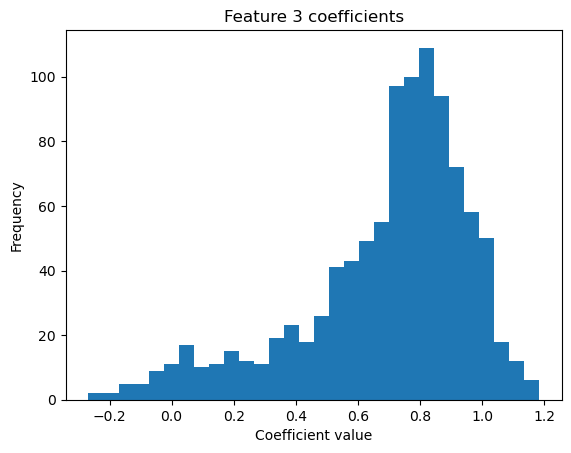

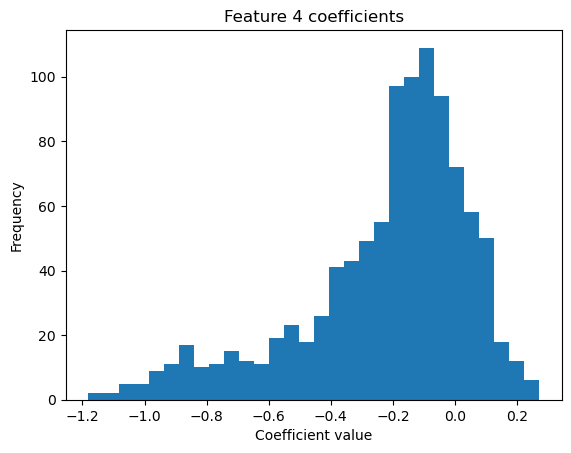

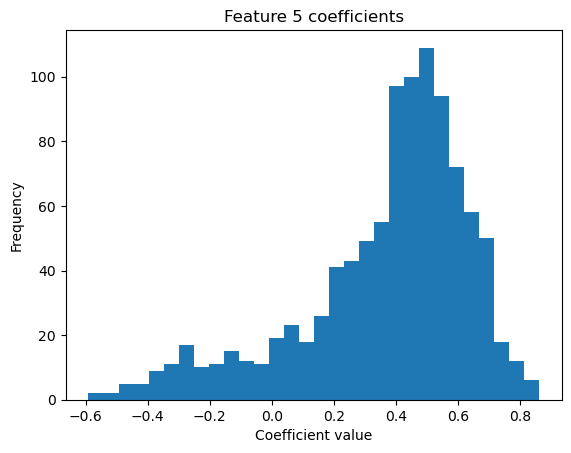

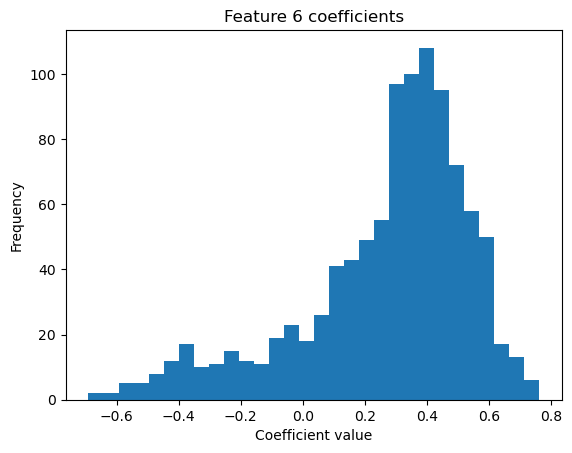

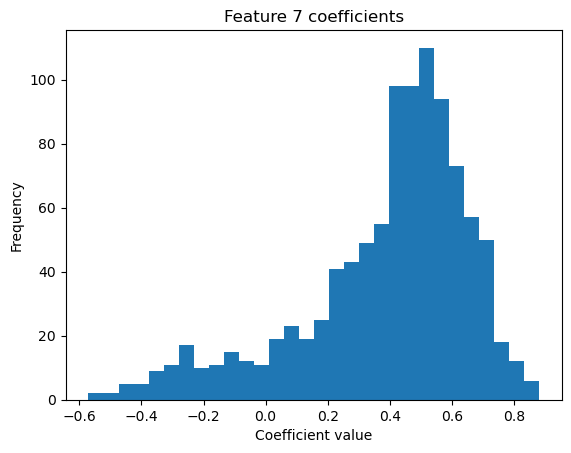

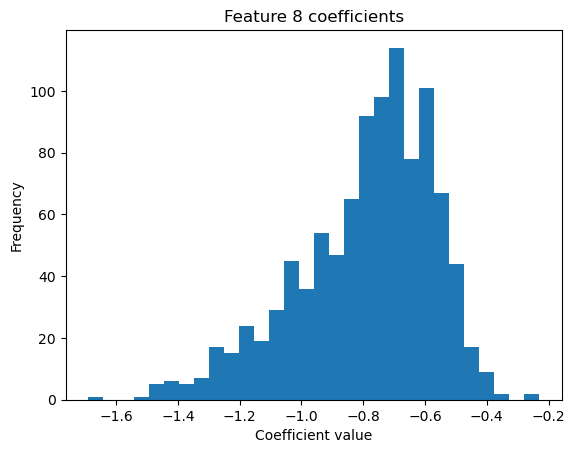

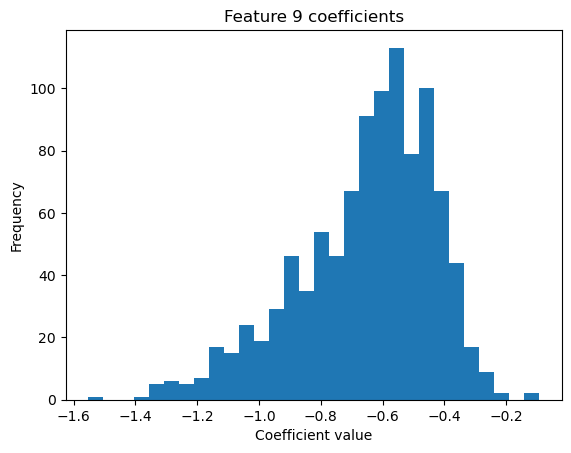

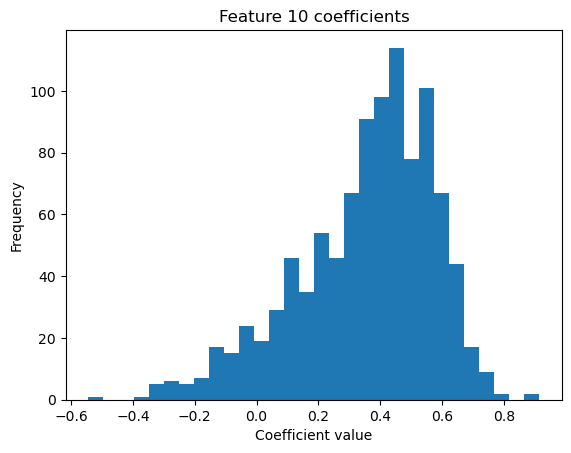

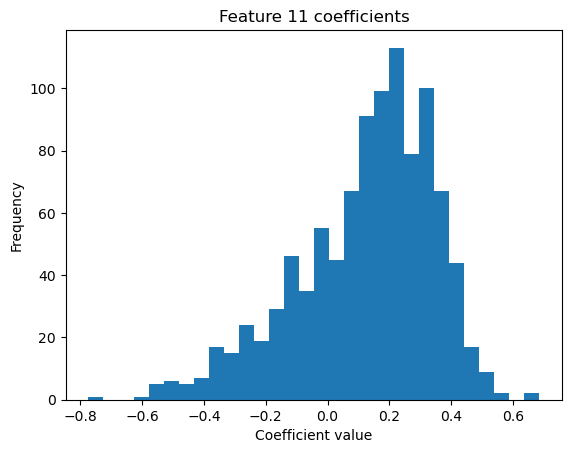

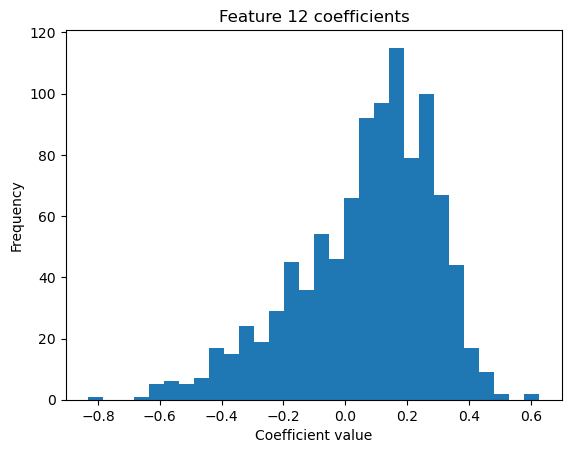

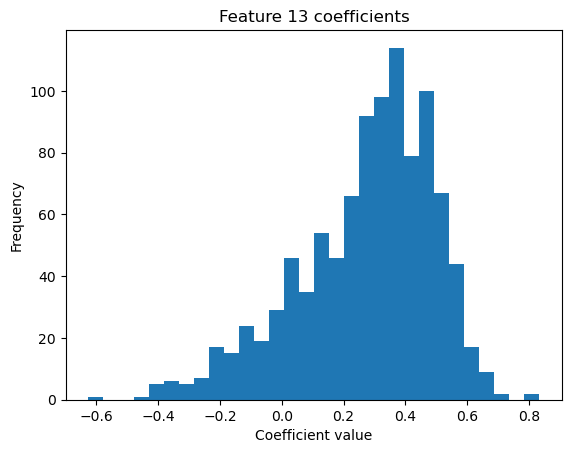

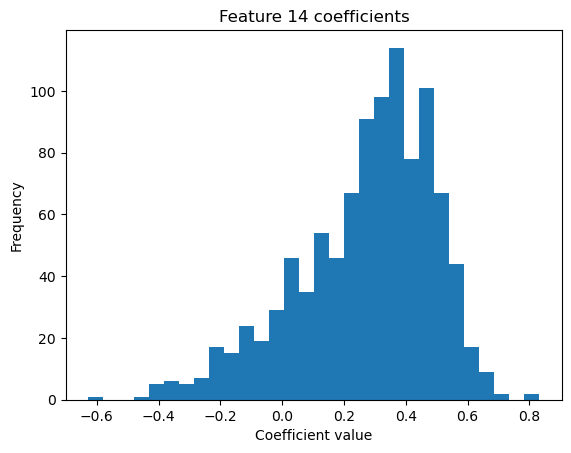

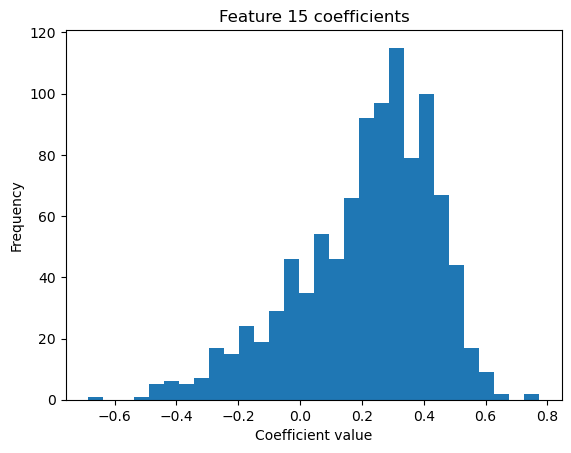

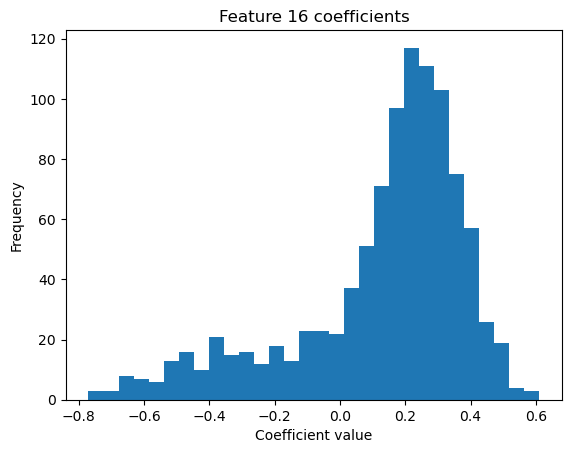

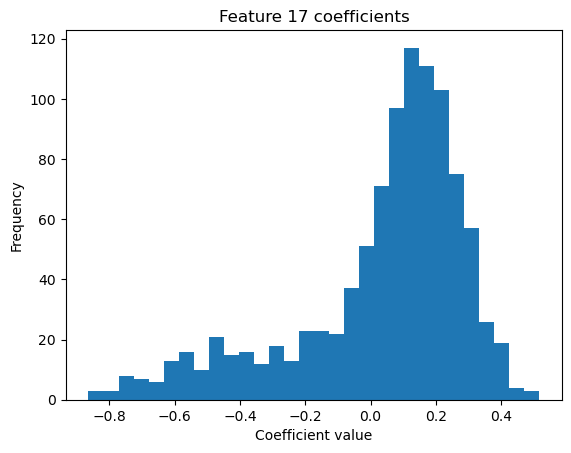

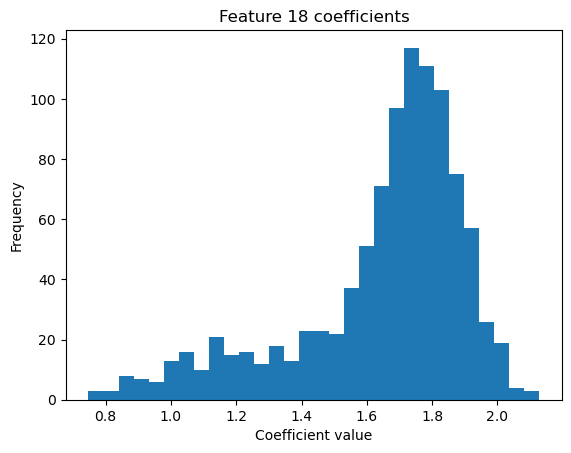

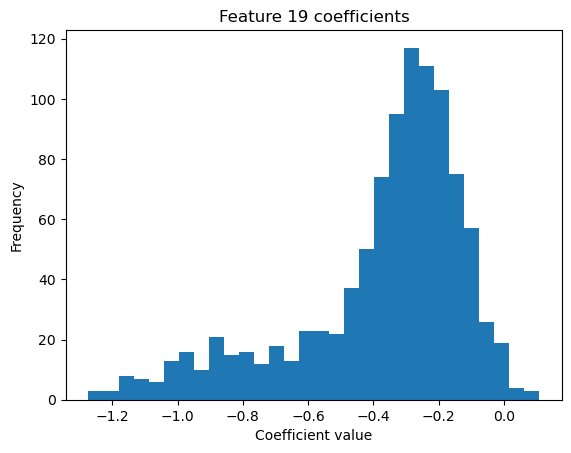

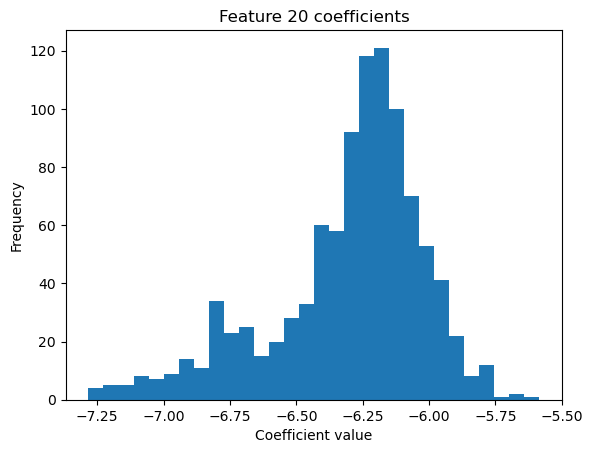

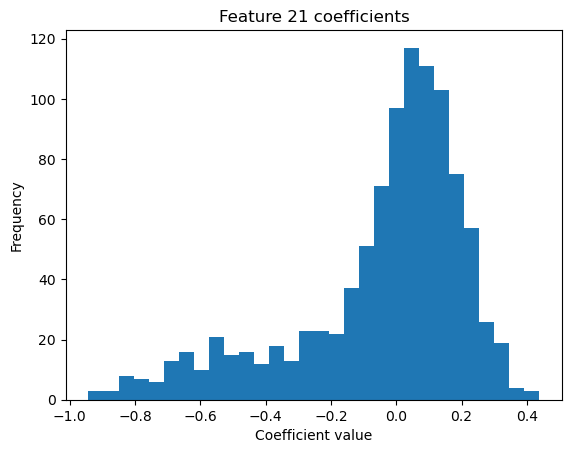

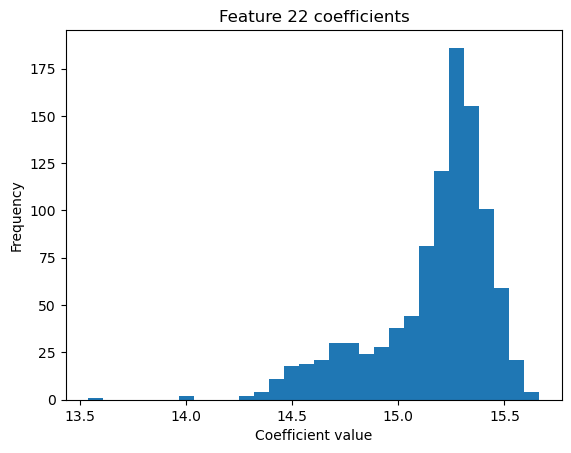

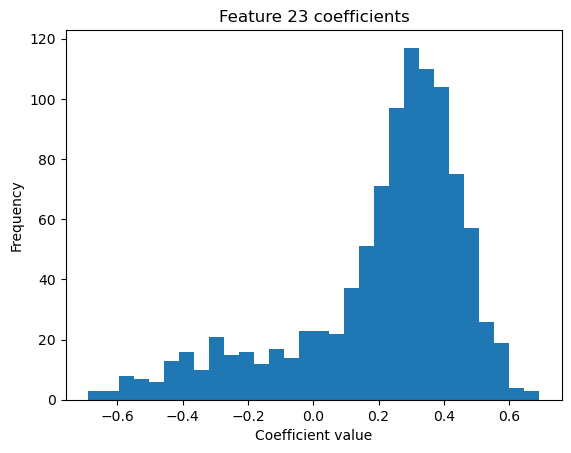

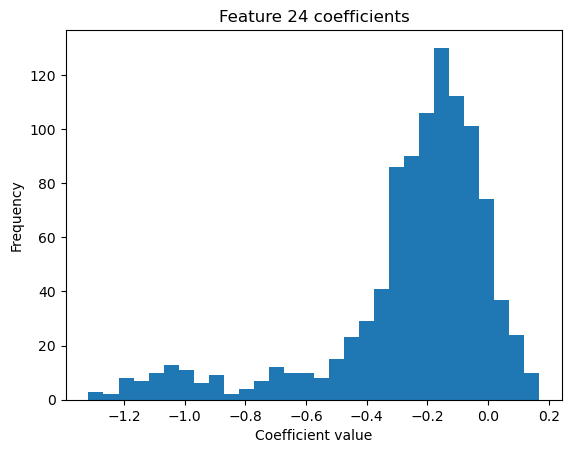

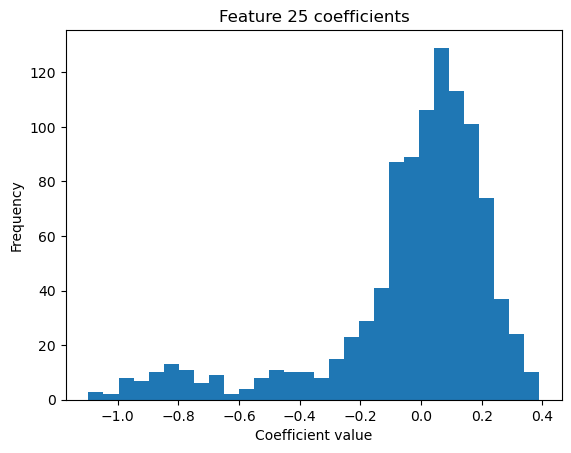

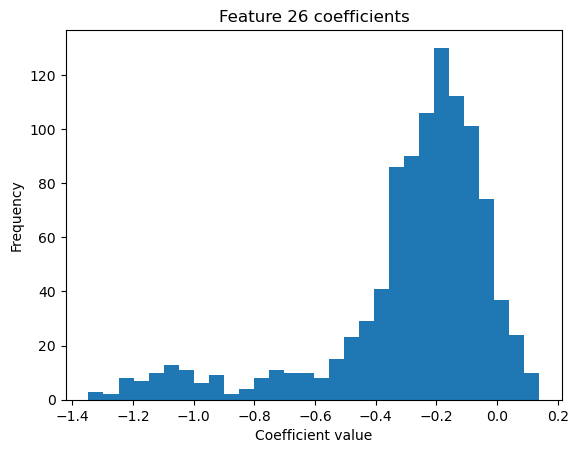

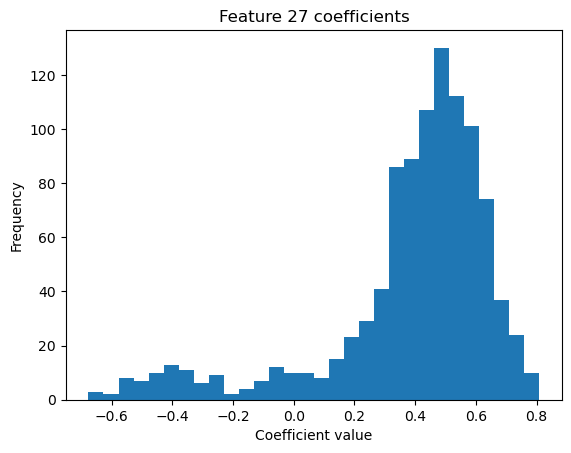

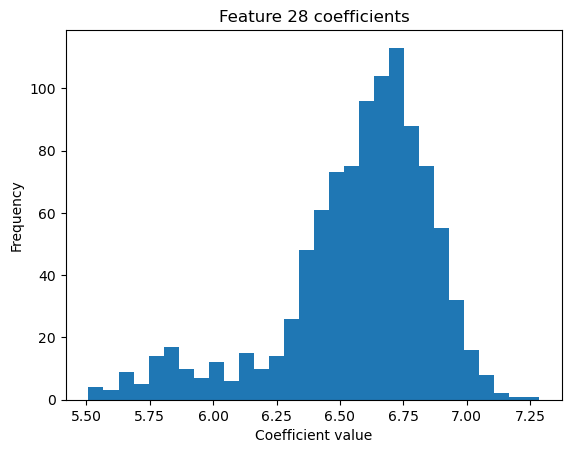

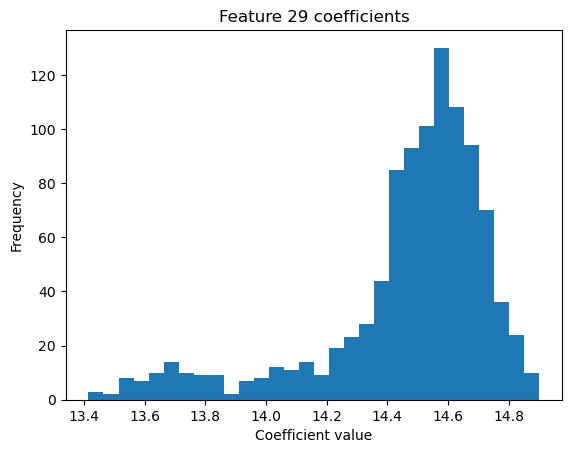

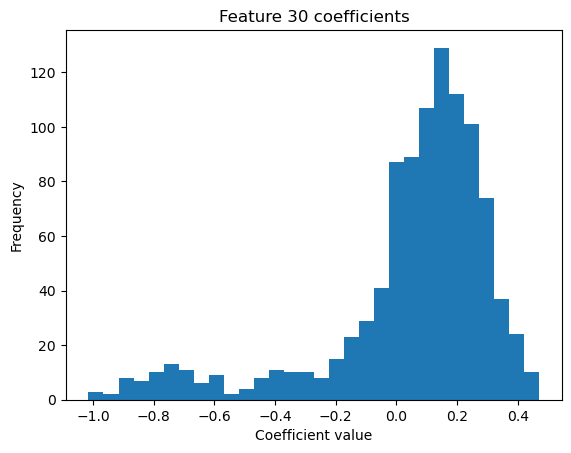

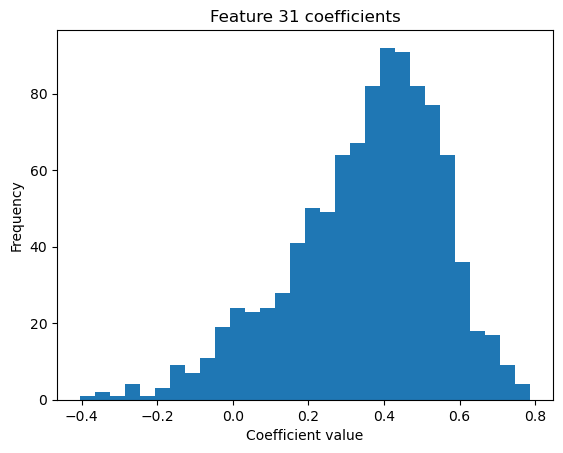

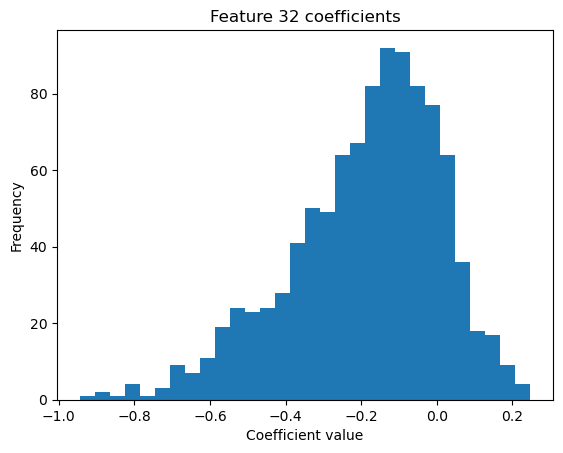

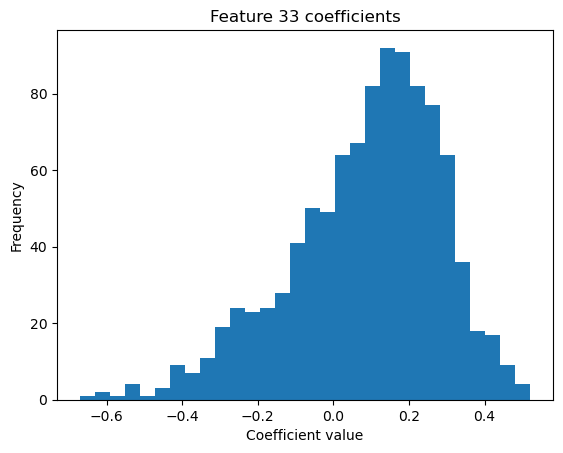

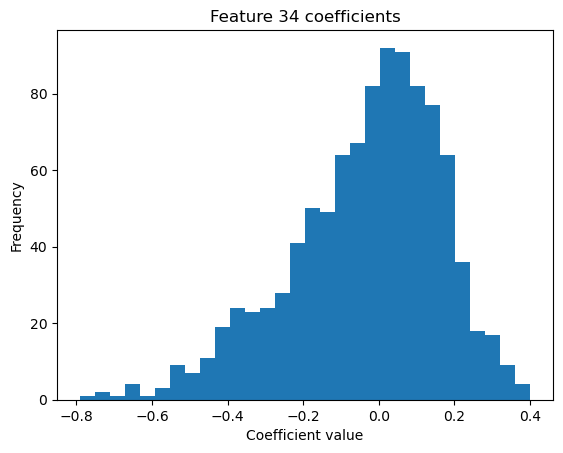

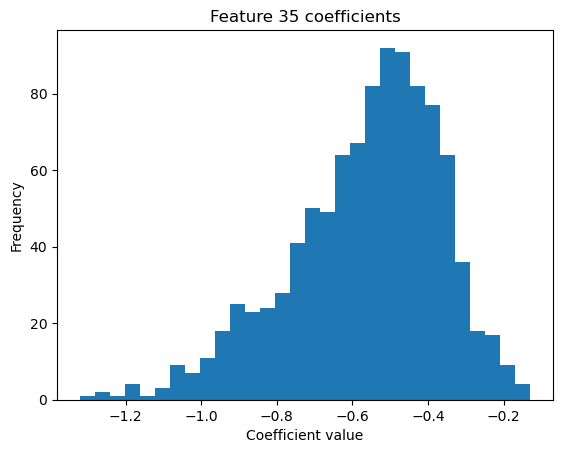

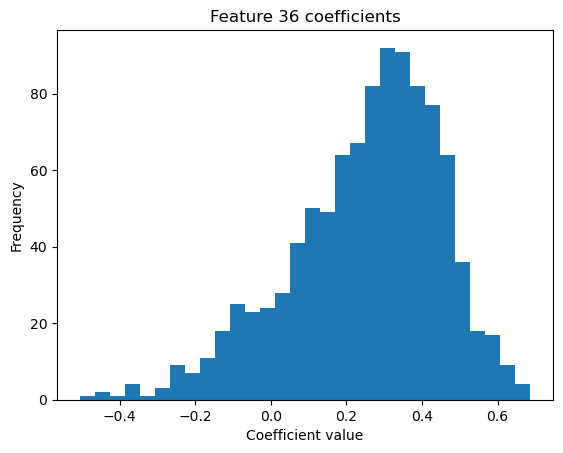

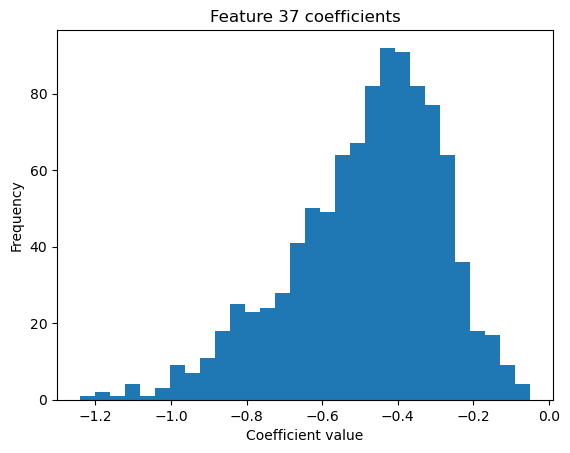

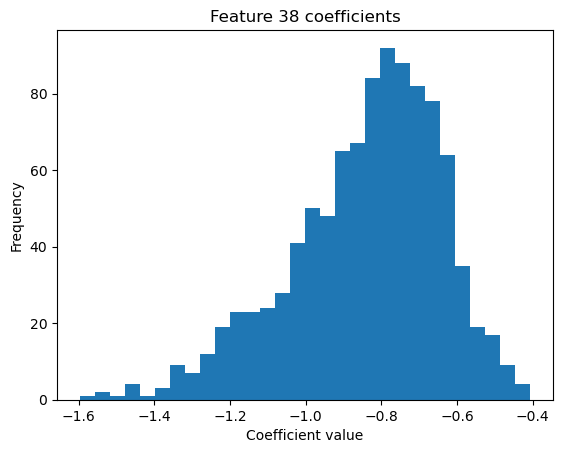

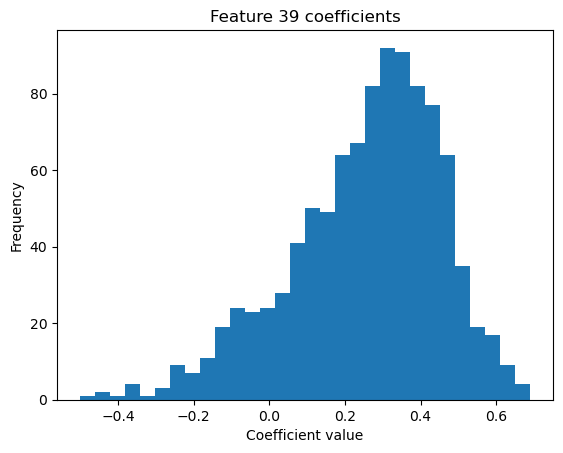

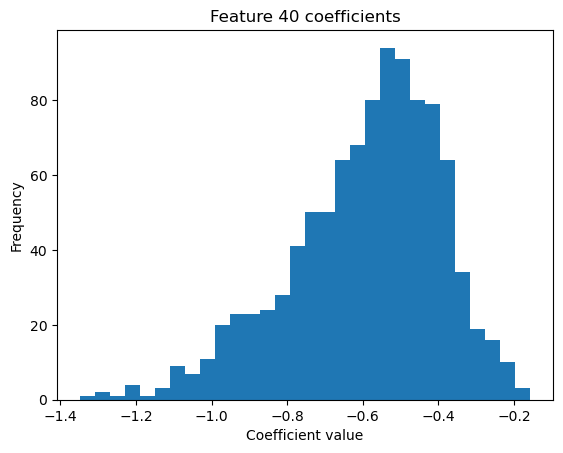

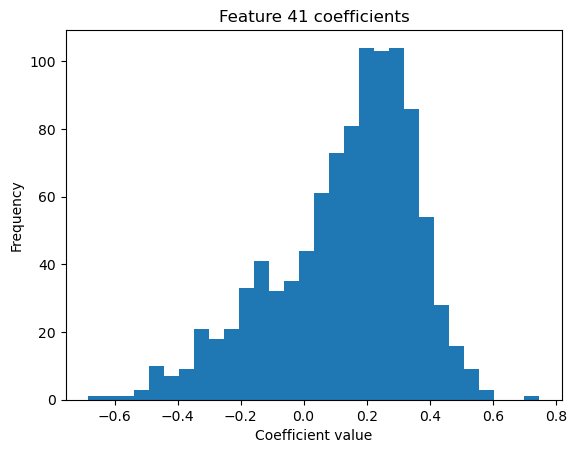

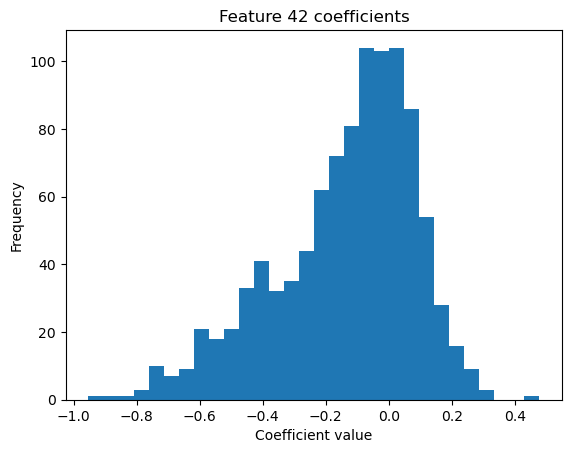

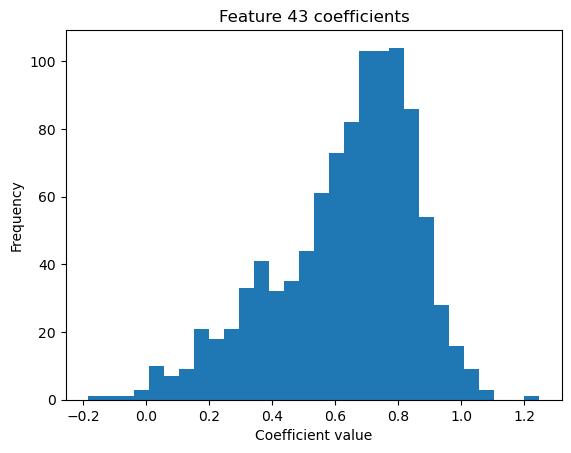

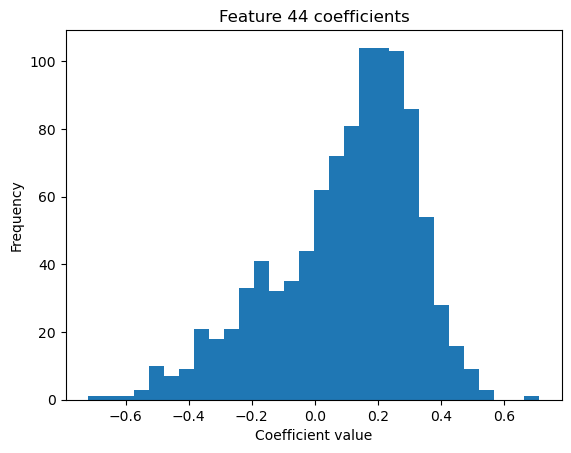

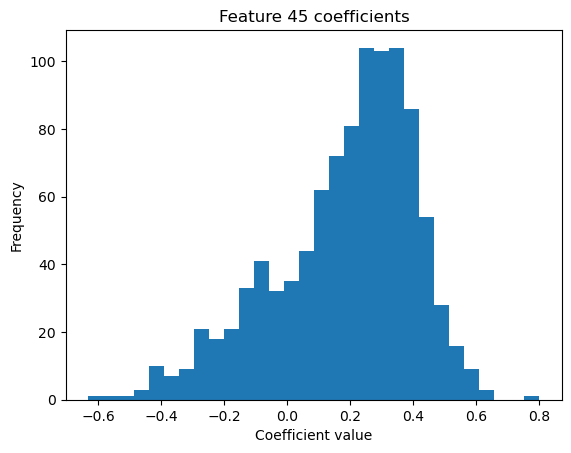

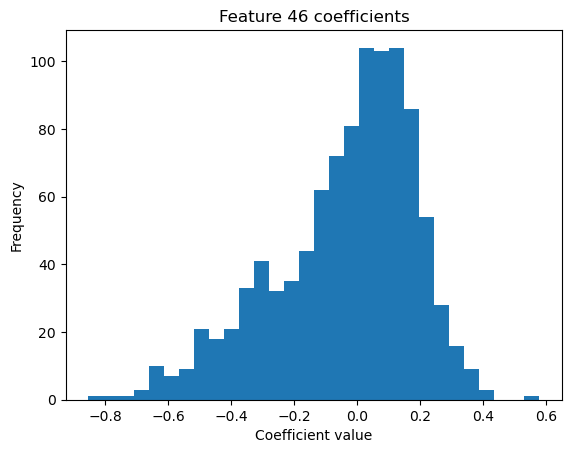

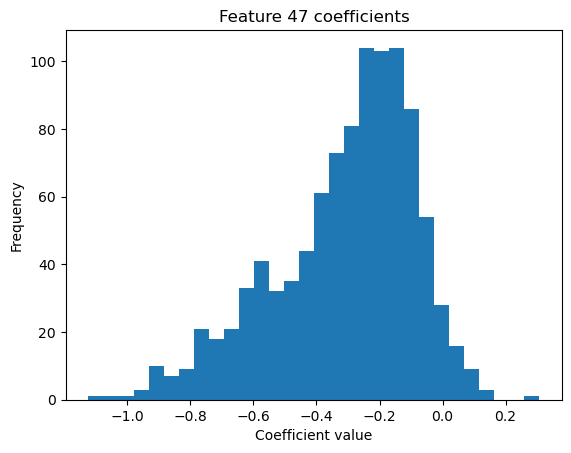

In [25]:

for feature, coefficients in dic_test.items():
    plt.figure()
    plt.hist(coefficients, bins=30)
    plt.title(f"Feature {feature} coefficients")
    plt.xlabel("Coefficient value")
    plt.ylabel("Frequency")
    plt.show()


In [23]:
X

,age,gender_Female,gender_Male,marital_status_Divorced,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,highest_qualification_A Levels,highest_qualification_Degree,...,gross_income_Refused,"gross_income_Under 2,600",gross_income_Unknown,region_London,region_Midlands & East Anglia,region_Scotland,region_South East,region_South West,region_The North,region_Wales
0,38,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,42,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,40,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,40,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,39,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,22,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1687,49,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1688,45,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1689,51,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:

model = LogisticRegression(penalty='l1',C=0.1, solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)

In [17]:

print(classification_report(y_test, predictions))

print("Accuracy:", score*100,"%")

              precision    recall  f1-score   support

          No       0.76      1.00      0.86       258
         Yes       0.00      0.00      0.00        81

    accuracy                           0.76       339
   macro avg       0.38      0.50      0.43       339
weighted avg       0.58      0.76      0.66       339

Accuracy: 76.10619469026548 %


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Get the feature importance (coefficients) of the model
importance = model.coef_[0]

# Print the feature importance scores
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

X.info()

Feature: 0, Score: -0.02123
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.09083
Feature: 3, Score: 0.12091
Feature: 4, Score: -0.43312
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.46760
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.04163
Feature: 31, Score: 0.14419
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000